# thinking1

# thinking2

# thinking3

# thinking4

# action

In [1]:
#数据加载
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('G:/project_courseware/订单配送/lesson07/score_card/cs-training.csv')
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
#去掉第一列
data  = data.iloc[:,1:]

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

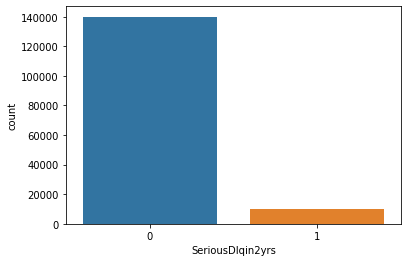

In [8]:
#data['SeriousDlqin2yrs'].value_counts()
#违约率SeriousDlqin2yrs进行可视化
import seaborn as sns
sns.countplot(x = 'SeriousDlqin2yrs',data = data)

In [9]:
#违约比例
data['SeriousDlqin2yrs'].sum()/len(data)

0.06684

In [10]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [11]:
data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Density'>

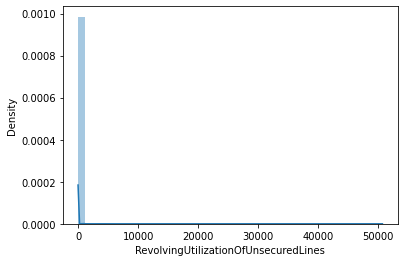

In [12]:
sns.distplot(data['RevolvingUtilizationOfUnsecuredLines'])

In [13]:
data.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [15]:
#使用中位数填充
data = data.fillna(data.median())
data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# 数据分箱
1)对于age字段，分成6段
2）对于NumberOfDependents  字段，分成6段

In [25]:
import math
#将age字段进行分箱
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
data['bin_age'] = pd.cut(data['age'],bins = age_bins)
data['bin_age']

0         (40.0, 50.0]
1         (25.0, 40.0]
2         (25.0, 40.0]
3         (25.0, 40.0]
4         (40.0, 50.0]
              ...     
149995     (70.0, inf]
149996    (40.0, 50.0]
149997    (50.0, 60.0]
149998    (25.0, 40.0]
149999    (60.0, 70.0]
Name: bin_age, Length: 150000, dtype: category
Categories (6, interval[float64]): [(-inf, 25.0] < (25.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, inf]]

In [17]:
#于NumberOfDependents 字段，分成6段
dependent_bins =  [-math.inf,2,4,6,8,10,math.inf]
data['bin_NumberOfDependents'] = pd.cut(data['NumberOfDependents'],bins =dependent_bins )
data[['NumberOfDependents','bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [19]:
### 对于3种逾期次数
dpd_bins =[-math.inf,1,2,3,4,5,6,7,8 , 9, math.inf]
data['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(data['NumberOfTime30-59DaysPastDueNotWorse'],bins = dpd_bins)
data['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(data['NumberOfTime60-89DaysPastDueNotWorse'],bins = dpd_bins)
data['bin_NumberOfTimes90DaysLate'] =  pd.cut(data['NumberOfTimes90DaysLate'],bins = dpd_bins)
#查看分箱情况
data[['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate','bin_NumberOfTime60-89DaysPastDueNotWorse']]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_NumberOfTime60-89DaysPastDueNotWorse
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [20]:
#4）对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
data['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(data['RevolvingUtilizationOfUnsecuredLines'],q = 5,duplicates = 'drop')
data['bin_DebtRatio'] = pd.qcut(data['DebtRatio'],q = 5,duplicates = 'drop')
data['bin_MonthlyIncome'] = pd.qcut(data['MonthlyIncome'],q = 5,duplicates = 'drop')
data['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(data['NumberOfOpenCreditLinesAndLoans'],q = 5,duplicates = 'drop')
data['bin_NumberRealEstateLoansOrLines'] = pd.qcut(data['NumberRealEstateLoansOrLines'],q = 5,duplicates = 'drop')
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,age_bins,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(2.0, 54.0]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-0.001, 1.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(-0.001, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-0.001, 1.0]"


In [21]:
data['bin_NumberRealEstateLoansOrLines'].value_counts()

(-0.001, 1.0]    108526
(1.0, 2.0]        31522
(2.0, 54.0]        9952
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [26]:
#统计分箱字段
bin_cols = [c for c in data.columns.values if c.startswith('bin_')]
bin_cols

['bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines',
 'bin_age']

In [41]:
#计算IV，衡量变量的预测能力
def cal_IV(df,feature,target):
    lst = []
    cols = ['Variable','Value','ALL','Bad']
    #对deature字段中的每个分箱取值进行遍历
    for i in range(df[feature].nunique()):
        #得到feaeture字段的第i个分箱取值val
        val = list(df[feature].unique())[i]
        #统计feature feature_value，这个value的个数，这个value导致target=1的个数
        lst.append([feature,val,len(df[df[feature] == val]),\
            len(df[(df[feature] == val) & (df[target] == 1)])])
    #print(lst)
    data = pd.DataFrame(lst,columns = cols)
    data = data[data['Bad']>0]
    
    data['Share'] = data['ALL']/data['ALL'].sum()
    data['Bad Rate'] = data['Bad']/data['ALL']
    data['Margin Bad'] = data['Bad'] /data['Bad'].sum()
    data['Margin Good'] = (data['ALL']-data['Bad'])/(data['ALL'].sum() -data['Bad'].sum())
    data['woe'] = np.log(data['Margin Bad']/data['Margin Good'])
    data['iv'] = (data['woe']*(data['Margin Bad']-data['Margin Good'])).sum()
    data = data.sort_values(by = ['Variable','Value'])
    return data['iv'].values[0]
    print(data)
cal_IV(data,'bin_age','SeriousDlqin2yrs')

0.24041120302785982

In [42]:
df = data
feature = 'bin_age'
val = list(df[feature].unique())[0]
print(val)
df[df[feature]==val].count()

(40.0, 50.0]


SeriousDlqin2yrs                            35037
RevolvingUtilizationOfUnsecuredLines        35037
age                                         35037
NumberOfTime30-59DaysPastDueNotWorse        35037
DebtRatio                                   35037
MonthlyIncome                               35037
NumberOfOpenCreditLinesAndLoans             35037
NumberOfTimes90DaysLate                     35037
NumberRealEstateLoansOrLines                35037
NumberOfTime60-89DaysPastDueNotWorse        35037
NumberOfDependents                          35037
age_bins                                    35037
bin_NumberOfDependents                      35037
bin_NumberOfTime30-59DaysPastDueNotWorse    35037
bin_NumberOfTime60-89DaysPastDueNotWorse    35037
bin_NumberOfTimes90DaysLate                 35037
bin_RevolvingUtilizationOfUnsecuredLines    35037
bin_DebtRatio                               35037
bin_MonthlyIncome                           35037
bin_NumberOfOpenCreditLinesAndLoans         35037


In [45]:
#计算每个字段的iv值
for f in bin_cols:
    print(f,cal_IV(data,f,'SeriousDlqin2yrs'))

bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.0120914141106244
bin_age 0.24041120302785982


# 进行挑选>0.1的
*bin_NumberOfTime30-59DaysPastDueNotWorse
*bin_NumberOfTime60-89DaysPastDueNotWorse
*bin_NumberOfTimes90DaysLate
*bin_RevolvingUtilizationOfUnsecuredLines
*bin_age

In [48]:
feature_cols  = ['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse',
'bin_NumberOfTimes90DaysLate','bin_RevolvingUtilizationOfUnsecuredLines','bin_age']



In [65]:
def cal_WOE(df,features,target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join,df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad',target+'count':'all'})
        print(df_woe)
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe['margin bad'] = df_woe['bad']/df_woe['bad'].sum()
        df_woe['margin good'] = df_woe['good']/df_woe['good'].sum()
        df_woe['woe'] = np.log1p(df_woe['margin bad']/df_woe['margin good'])
        df_woe.columns = [c if c == f else c+'_'+f for c in list(df_woe.columns.values)]
        #print(df_woe)
        df_new =df_new.merge(df_woe,on = f,how = 'left')
    return df_new 
#计算这些特诊的woe
df_woe = cal_WOE(data,bin_cols,'SeriousDlqin2yrs')

  bin_NumberOfDependents   bad     all
0            (-inf, 2.0]  8793  136664
1             (2.0, 4.0]  1134   12345
2             (4.0, 6.0]    92     904
3             (6.0, 8.0]     7      75
4            (8.0, 10.0]     0      10
5            (10.0, inf]     0       2
  bin_NumberOfTime30-59DaysPastDueNotWorse   bad     all
0                              (-inf, 1.0]  7450  142051
1                               (1.0, 2.0]  1219    4598
2                               (2.0, 3.0]   618    1754
3                               (3.0, 4.0]   318     747
4                               (4.0, 5.0]   154     342
5                               (5.0, 6.0]    74     140
6                               (6.0, 7.0]    28      54
7                               (7.0, 8.0]     8      25
8                               (8.0, 9.0]     4      12
9                               (9.0, inf]   153     277
  bin_NumberOfTime60-89DaysPastDueNotWorse   bad     all
0                              (-inf, 1.0] 

In [66]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines,bad_bin_age,all_bin_age,good_bin_age,margin bad_bin_age,margin good_bin_age,woe_bin_age
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,9111,0.083882,0.065091,0.827981,2893,35037,32144,0.288550,0.229643,0.813822
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,101106,0.740076,0.722320,0.705363,3296,32069,28773,0.328745,0.205560,0.955231
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,101106,0.740076,0.722320,0.705363,3296,32069,28773,0.328745,0.205560,0.955231
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,101106,0.740076,0.722320,0.705363,3296,32069,28773,0.328745,0.205560,0.955231
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,101106,0.740076,0.722320,0.705363,2893,35037,32144,0.288550,0.229643,0.813822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,101106,0.740076,0.722320,0.705363,398,17636,17238,0.039697,0.123151,0.279404
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,101106,0.740076,0.722320,0.705363,2893,35037,32144,0.288550,0.229643,0.813822
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,101106,0.740076,0.722320,0.705363,2149,34806,32657,0.214343,0.233308,0.651655
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,101106,0.740076,0.722320,0.705363,3296,32069,28773,0.328745,0.205560,0.955231


In [67]:
feature_cols = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse',
'NumberOfTimes90DaysLate','RevolvingUtilizationOfUnsecuredLines','age']
feature_cols

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age']

In [68]:
#得到woe的规则
df_bin_to_woe = pd.DataFrame(columns = ['feature','bin','woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+ f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['feature'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
df_bin_to_woe

,feature,bin,woe
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
251,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
423,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860
1052,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6909,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
10822,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007


In [69]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
woe_cols

['woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines',
 'woe_bin_age']

In [70]:
#LG建模
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size = 0.3)


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.9368


In [47]:
data[['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse',
'bin_NumberOfTimes90DaysLate','bin_RevolvingUtilizationOfUnsecuredLines','bin_age']]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_age
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(40.0, 50.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(25.0, 40.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(25.0, 40.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(25.0, 40.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(40.0, 50.0]"
...,...,...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(70.0, inf]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(40.0, 50.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(50.0, 60.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(25.0, 40.0]"
